In [1]:
% run audio_utils.ipynb

import tensorflow as tf
import os
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
content_filename = "content.wav"
style_filename = "style.wav"

In [3]:
display(Audio(content_filename))
display(Audio(style_filename))

In [28]:
audio_utils = AudioUtils()
a_content, sampling_rate = audio_utils.wave_to_spectrogram(content_filename,2048)
a_style, sampling_rate = audio_utils.wave_to_spectrogram(style_filename,2048)

In [5]:
n_samples = a_content.shape[1] # considering time domain as samples
n_channels = a_content.shape[0] # considering frequency domain as channels
a_style = a_style[:n_channels, :n_samples] # making sure style and content tensors have same shape

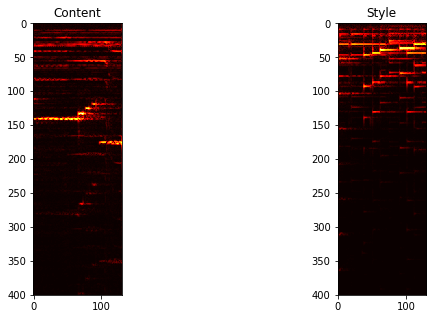

In [6]:
#plotting style and content spectrogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Content')
plt.imshow(a_content[:400,:],cmap='hot')
plt.subplot(1, 2, 2)
plt.title('Style')
plt.imshow(a_style[:400,:],cmap='hot')
plt.show()

In [7]:
a_content.shape

(1025, 130)

In [8]:
x = np.random.randn(1,1025,130,1)

In [9]:
a_content = a_content.reshape((1,1025,130,1))

In [10]:
a_content_tf = np.ascontiguousarray(a_content)

In [11]:
a_style = a_style.reshape((1,1025,130,1))

In [12]:
a_style_tf = np.ascontiguousarray(a_style)

In [13]:
kernel = np.random.randn(3,3,1,5) * 0.01

In [14]:
g = tf.Graph()
with g.as_default(), g.device('/cpu:0'), tf.Session() as sess:
    y = tf.placeholder('float32', [1,1025,130,1], name="y")
    kernel_tf = tf.constant(kernel, name="kernel", dtype='float32')
    conv = tf.nn.conv2d(
            y,
            kernel_tf,
            strides=[1, 1, 1, 1],
            padding="VALID",
            name="conv")

    net = tf.nn.relu(conv)
    content_features = net.eval(feed_dict={y: a_content})
    style_features = net.eval(feed_dict={y: a_style})

In [15]:
style_features.shape

(1, 1023, 128, 5)

In [16]:
features = np.reshape(style_features,(style_features.shape[1] * style_features.shape[2],5))

In [17]:
style_gram = np.matmul(features.T, features) / 130

In [37]:
result = None
with tf.Graph().as_default():
    x = tf.Variable(np.random.randn(1,1025,130,1).astype(np.float32)*1e-3, name="x")
    kernel_tf = tf.constant(kernel, name="kernel", dtype='float32')
    conv = tf.nn.conv2d(
        x,
        kernel_tf,
        strides=[1, 1, 1, 1],
        padding="VALID",
        name="conv")

    net = tf.nn.relu(conv)
    content_loss = 0.01 * 2 * tf.nn.l2_loss(
            net - content_features)

    style_loss = 0


    feats = tf.reshape(net,(style_features.shape[1] * style_features.shape[2],5))
    gram = tf.matmul(tf.transpose(feats), feats)  / 130
    style_loss = 2 * tf.nn.l2_loss(gram - style_gram)

     # Overall loss
    loss = content_loss + style_loss

    #opt = tf.contrib.opt.ScipyOptimizerInterface(
          #loss, method='L-BFGS-B', options={'maxiter': 10000})
    opt = tf.train.GradientDescentOptimizer(2).minimize(loss)
    # Optimization
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        print('Started optimization.')
        for i in range(20000):
            print(i)
            sess.run(opt)
            print(sess.run(loss))
            
        #opt.minimize(sess)

        print ('Final loss:', loss.eval())
        result = x.eval()

Started optimization.
0
0.0517352
1
0.0517295
2
0.0517237
3
0.0517176
4
0.0517112
5
0.0517047
6
0.0516979
7
0.051691
8
0.051684
9
0.0516767
10
0.0516693
11
0.0516617
12
0.051654
13
0.0516462
14
0.0516383
15
0.0516304
16
0.0516222
17
0.051614
18
0.0516058
19
0.0515974
20
0.051589
21
0.0515805
22
0.051572
23
0.0515633
24
0.0515546
25
0.0515458
26
0.051537
27
0.051528
28
0.051519
29
0.0515099
30
0.0515008
31
0.0514916
32
0.0514824
33
0.0514731
34
0.0514637
35
0.0514544
36
0.051445
37
0.0514355
38
0.0514259
39
0.0514164
40
0.0514068
41
0.0513971
42
0.0513874
43
0.0513777
44
0.0513679
45
0.0513581
46
0.0513483
47
0.0513384
48
0.0513285
49
0.0513185
50
0.0513086
51
0.0512986
52
0.0512886
53
0.0512785
54
0.0512684
55
0.0512583
56
0.0512482
57
0.0512381
58
0.0512279
59
0.0512177
60
0.0512074
61
0.0511972
62
0.0511869
63
0.0511766
64
0.0511663
65
0.051156
66
0.0511456
67
0.0511352
68
0.0511249
69
0.0511145
70
0.051104
71
0.0510936
72
0.0510831
73
0.0510727
74
0.0510622
75
0.0510517
76
0.0510412

0.0456059
603
0.0455964
604
0.045587
605
0.0455775
606
0.0455681
607
0.0455587
608
0.0455493
609
0.0455398
610
0.0455304
611
0.045521
612
0.0455116
613
0.0455021
614
0.0454927
615
0.0454833
616
0.0454739
617
0.0454645
618
0.0454551
619
0.0454458
620
0.0454364
621
0.045427
622
0.0454176
623
0.0454082
624
0.0453989
625
0.0453895
626
0.0453802
627
0.0453708
628
0.0453614
629
0.0453521
630
0.0453428
631
0.0453334
632
0.0453241
633
0.0453147
634
0.0453054
635
0.0452961
636
0.0452868
637
0.0452774
638
0.0452681
639
0.0452588
640
0.0452495
641
0.0452402
642
0.0452309
643
0.0452216
644
0.0452123
645
0.0452031
646
0.0451937
647
0.0451845
648
0.0451752
649
0.0451659
650
0.0451566
651
0.0451474
652
0.0451381
653
0.0451288
654
0.0451196
655
0.0451103
656
0.0451011
657
0.0450919
658
0.0450826
659
0.0450734
660
0.0450642
661
0.0450549
662
0.0450457
663
0.0450365
664
0.0450273
665
0.0450181
666
0.0450089
667
0.0449997
668
0.0449905
669
0.0449812
670
0.0449721
671
0.0449629
672
0.0449537
673
0.0449445

0.0407328
1184
0.0407254
1185
0.040718
1186
0.0407106
1187
0.0407032
1188
0.0406958
1189
0.0406884
1190
0.040681
1191
0.0406737
1192
0.0406663
1193
0.0406589
1194
0.0406515
1195
0.0406442
1196
0.0406368
1197
0.0406295
1198
0.0406221
1199
0.0406147
1200
0.0406074
1201
0.0406
1202
0.0405927
1203
0.0405853
1204
0.040578
1205
0.0405707
1206
0.0405633
1207
0.040556
1208
0.0405487
1209
0.0405413
1210
0.040534
1211
0.0405267
1212
0.0405194
1213
0.0405121
1214
0.0405048
1215
0.0404975
1216
0.0404902
1217
0.0404829
1218
0.0404756
1219
0.0404683
1220
0.040461
1221
0.0404537
1222
0.0404464
1223
0.0404392
1224
0.0404319
1225
0.0404246
1226
0.0404173
1227
0.0404101
1228
0.0404028
1229
0.0403956
1230
0.0403883
1231
0.040381
1232
0.0403738
1233
0.0403665
1234
0.0403593
1235
0.0403521
1236
0.0403448
1237
0.0403376
1238
0.0403304
1239
0.0403231
1240
0.0403159
1241
0.0403087
1242
0.0403014
1243
0.0402942
1244
0.040287
1245
0.0402798
1246
0.0402726
1247
0.0402654
1248
0.0402582
1249
0.040251
1250
0.04024

0.0370703
1739
0.0370645
1740
0.0370586
1741
0.0370527
1742
0.0370469
1743
0.037041
1744
0.0370352
1745
0.0370294
1746
0.0370235
1747
0.0370177
1748
0.0370118
1749
0.037006
1750
0.0370002
1751
0.0369944
1752
0.0369885
1753
0.0369827
1754
0.0369769
1755
0.0369711
1756
0.0369653
1757
0.0369595
1758
0.0369536
1759
0.0369478
1760
0.036942
1761
0.0369362
1762
0.0369304
1763
0.0369247
1764
0.0369189
1765
0.0369131
1766
0.0369073
1767
0.0369015
1768
0.0368957
1769
0.0368899
1770
0.0368841
1771
0.0368783
1772
0.0368726
1773
0.0368668
1774
0.036861
1775
0.0368553
1776
0.0368495
1777
0.0368437
1778
0.036838
1779
0.0368322
1780
0.0368264
1781
0.0368207
1782
0.036815
1783
0.0368092
1784
0.0368035
1785
0.0367977
1786
0.036792
1787
0.0367862
1788
0.0367805
1789
0.0367748
1790
0.036769
1791
0.0367633
1792
0.0367576
1793
0.0367518
1794
0.0367461
1795
0.0367404
1796
0.0367347
1797
0.036729
1798
0.0367233
1799
0.0367176
1800
0.0367118
1801
0.0367061
1802
0.0367004
1803
0.0366947
1804
0.036689
1805
0.036

0.0341619
2295
0.0341572
2296
0.0341525
2297
0.0341479
2298
0.0341433
2299
0.0341386
2300
0.034134
2301
0.0341293
2302
0.0341247
2303
0.0341201
2304
0.0341154
2305
0.0341108
2306
0.0341061
2307
0.0341015
2308
0.0340969
2309
0.0340922
2310
0.0340876
2311
0.034083
2312
0.0340784
2313
0.0340737
2314
0.0340691
2315
0.0340645
2316
0.0340599
2317
0.0340553
2318
0.0340507
2319
0.034046
2320
0.0340414
2321
0.0340368
2322
0.0340322
2323
0.0340276
2324
0.034023
2325
0.0340184
2326
0.0340138
2327
0.0340093
2328
0.0340047
2329
0.0340001
2330
0.0339955
2331
0.0339909
2332
0.0339863
2333
0.0339817
2334
0.0339771
2335
0.0339725
2336
0.033968
2337
0.0339634
2338
0.0339588
2339
0.0339542
2340
0.0339497
2341
0.0339451
2342
0.0339405
2343
0.033936
2344
0.0339314
2345
0.0339269
2346
0.0339223
2347
0.0339177
2348
0.0339132
2349
0.0339086
2350
0.0339041
2351
0.0338995
2352
0.033895
2353
0.0338904
2354
0.0338859
2355
0.0338813
2356
0.0338768
2357
0.0338722
2358
0.0338677
2359
0.0338632
2360
0.0338586
2361
0.

0.031843
2851
0.0318393
2852
0.0318356
2853
0.0318319
2854
0.0318282
2855
0.0318245
2856
0.0318207
2857
0.031817
2858
0.0318133
2859
0.0318096
2860
0.0318059
2861
0.0318022
2862
0.0317985
2863
0.0317948
2864
0.0317911
2865
0.0317874
2866
0.0317837
2867
0.03178
2868
0.0317763
2869
0.0317726
2870
0.0317689
2871
0.0317652
2872
0.0317615
2873
0.0317579
2874
0.0317542
2875
0.0317505
2876
0.0317468
2877
0.0317431
2878
0.0317394
2879
0.0317357
2880
0.0317321
2881
0.0317284
2882
0.0317247
2883
0.0317211
2884
0.0317174
2885
0.0317137
2886
0.03171
2887
0.0317064
2888
0.0317027
2889
0.031699
2890
0.0316954
2891
0.0316917
2892
0.0316881
2893
0.0316844
2894
0.0316807
2895
0.0316771
2896
0.0316734
2897
0.0316698
2898
0.0316661
2899
0.0316625
2900
0.0316588
2901
0.0316552
2902
0.0316516
2903
0.0316479
2904
0.0316443
2905
0.0316406
2906
0.031637
2907
0.0316334
2908
0.0316297
2909
0.0316261
2910
0.0316224
2911
0.0316188
2912
0.0316151
2913
0.0316115
2914
0.0316079
2915
0.0316043
2916
0.0316007
2917
0.0

0.0299827
3407
0.0299797
3408
0.0299767
3409
0.0299737
3410
0.0299707
3411
0.0299677
3412
0.0299647
3413
0.0299617
3414
0.0299588
3415
0.0299558
3416
0.0299528
3417
0.0299498
3418
0.0299468
3419
0.0299438
3420
0.0299408
3421
0.0299379
3422
0.0299349
3423
0.0299319
3424
0.0299289
3425
0.0299259
3426
0.029923
3427
0.02992
3428
0.029917
3429
0.0299141
3430
0.0299111
3431
0.0299081
3432
0.0299051
3433
0.0299022
3434
0.0298992
3435
0.0298962
3436
0.0298932
3437
0.0298903
3438
0.0298873
3439
0.0298844
3440
0.0298814
3441
0.0298784
3442
0.0298755
3443
0.0298725
3444
0.0298696
3445
0.0298666
3446
0.0298637
3447
0.0298607
3448
0.0298578
3449
0.0298548
3450
0.0298519
3451
0.0298489
3452
0.029846
3453
0.029843
3454
0.0298401
3455
0.0298371
3456
0.0298342
3457
0.0298312
3458
0.0298283
3459
0.0298253
3460
0.0298224
3461
0.0298195
3462
0.0298165
3463
0.0298136
3464
0.0298107
3465
0.0298077
3466
0.0298048
3467
0.0298019
3468
0.0297989
3469
0.029796
3470
0.0297931
3471
0.0297901
3472
0.0297872
3473
0.

0.028491
3958
0.0284886
3959
0.0284861
3960
0.0284837
3961
0.0284812
3962
0.0284788
3963
0.0284764
3964
0.0284739
3965
0.0284715
3966
0.0284691
3967
0.0284667
3968
0.0284642
3969
0.0284618
3970
0.0284594
3971
0.0284569
3972
0.0284545
3973
0.0284521
3974
0.0284496
3975
0.0284472
3976
0.0284448
3977
0.0284424
3978
0.02844
3979
0.0284376
3980
0.0284351
3981
0.0284327
3982
0.0284303
3983
0.0284279
3984
0.0284255
3985
0.0284231
3986
0.0284207
3987
0.0284182
3988
0.0284158
3989
0.0284134
3990
0.028411
3991
0.0284086
3992
0.0284062
3993
0.0284038
3994
0.0284014
3995
0.028399
3996
0.0283966
3997
0.0283942
3998
0.0283918
3999
0.0283894
4000
0.028387
4001
0.0283846
4002
0.0283822
4003
0.0283798
4004
0.0283774
4005
0.028375
4006
0.0283726
4007
0.0283702
4008
0.0283678
4009
0.0283654
4010
0.028363
4011
0.0283606
4012
0.0283582
4013
0.0283558
4014
0.0283534
4015
0.028351
4016
0.0283487
4017
0.0283463
4018
0.0283439
4019
0.0283415
4020
0.0283391
4021
0.0283367
4022
0.0283344
4023
0.028332
4024
0.028

0.0272606
4514
0.0272586
4515
0.0272566
4516
0.0272545
4517
0.0272526
4518
0.0272505
4519
0.0272486
4520
0.0272465
4521
0.0272445
4522
0.0272426
4523
0.0272406
4524
0.0272386
4525
0.0272366
4526
0.0272346
4527
0.0272326
4528
0.0272306
4529
0.0272286
4530
0.0272266
4531
0.0272246
4532
0.0272227
4533
0.0272207
4534
0.0272187
4535
0.0272167
4536
0.0272147
4537
0.0272127
4538
0.0272107
4539
0.0272087
4540
0.0272067
4541
0.0272048
4542
0.0272028
4543
0.0272008
4544
0.0271988
4545
0.0271968
4546
0.0271949
4547
0.0271929
4548
0.0271909
4549
0.0271889
4550
0.0271869
4551
0.027185
4552
0.027183
4553
0.027181
4554
0.027179
4555
0.027177
4556
0.0271751
4557
0.0271731
4558
0.0271711
4559
0.0271692
4560
0.0271672
4561
0.0271652
4562
0.0271632
4563
0.0271613
4564
0.0271593
4565
0.0271573
4566
0.0271554
4567
0.0271534
4568
0.0271514
4569
0.0271495
4570
0.0271475
4571
0.0271456
4572
0.0271436
4573
0.0271416
4574
0.0271397
4575
0.0271377
4576
0.0271358
4577
0.0271338
4578
0.0271318
4579
0.0271299
4580


0.0262485
5069
0.0262468
5070
0.0262452
5071
0.0262435
5072
0.0262418
5073
0.0262402
5074
0.0262385
5075
0.0262369
5076
0.0262352
5077
0.0262336
5078
0.0262319
5079
0.0262303
5080
0.0262286
5081
0.0262269
5082
0.0262253
5083
0.0262237
5084
0.026222
5085
0.0262204
5086
0.0262187
5087
0.0262171
5088
0.0262154
5089
0.0262138
5090
0.0262121
5091
0.0262105
5092
0.0262088
5093
0.0262072
5094
0.0262055
5095
0.0262039
5096
0.0262023
5097
0.0262006
5098
0.026199
5099
0.0261973
5100
0.0261957
5101
0.026194
5102
0.0261924
5103
0.0261908
5104
0.0261891
5105
0.0261875
5106
0.0261858
5107
0.0261842
5108
0.0261826
5109
0.0261809
5110
0.0261793
5111
0.0261777
5112
0.026176
5113
0.0261744
5114
0.0261728
5115
0.0261711
5116
0.0261695
5117
0.0261679
5118
0.0261662
5119
0.0261646
5120
0.026163
5121
0.0261613
5122
0.0261597
5123
0.0261581
5124
0.0261565
5125
0.0261548
5126
0.0261532
5127
0.0261516
5128
0.02615
5129
0.0261483
5130
0.0261467
5131
0.0261451
5132
0.0261435
5133
0.0261418
5134
0.0261402
5135
0.

0.025405
5623
0.0254036
5624
0.0254022
5625
0.0254008
5626
0.0253994
5627
0.025398
5628
0.0253966
5629
0.0253952
5630
0.0253938
5631
0.0253924
5632
0.025391
5633
0.0253896
5634
0.0253883
5635
0.0253869
5636
0.0253855
5637
0.0253841
5638
0.0253827
5639
0.0253813
5640
0.0253799
5641
0.0253785
5642
0.0253771
5643
0.0253758
5644
0.0253744
5645
0.025373
5646
0.0253716
5647
0.0253702
5648
0.0253688
5649
0.0253674
5650
0.0253661
5651
0.0253647
5652
0.0253633
5653
0.0253619
5654
0.0253605
5655
0.0253591
5656
0.0253578
5657
0.0253564
5658
0.025355
5659
0.0253536
5660
0.0253522
5661
0.0253509
5662
0.0253495
5663
0.0253481
5664
0.0253467
5665
0.0253453
5666
0.025344
5667
0.0253426
5668
0.0253412
5669
0.0253398
5670
0.0253385
5671
0.0253371
5672
0.0253357
5673
0.0253343
5674
0.025333
5675
0.0253316
5676
0.0253302
5677
0.0253289
5678
0.0253275
5679
0.0253261
5680
0.0253247
5681
0.0253234
5682
0.025322
5683
0.0253206
5684
0.0253193
5685
0.0253179
5686
0.0253165
5687
0.0253152
5688
0.0253138
5689
0.0

0.0246918
6176
0.0246906
6177
0.0246894
6178
0.0246882
6179
0.024687
6180
0.0246858
6181
0.0246846
6182
0.0246835
6183
0.0246823
6184
0.0246811
6185
0.0246799
6186
0.0246787
6187
0.0246775
6188
0.0246764
6189
0.0246752
6190
0.024674
6191
0.0246728
6192
0.0246716
6193
0.0246704
6194
0.0246692
6195
0.0246681
6196
0.0246669
6197
0.0246657
6198
0.0246645
6199
0.0246633
6200
0.0246622
6201
0.024661
6202
0.0246598
6203
0.0246586
6204
0.0246574
6205
0.0246563
6206
0.0246551
6207
0.0246539
6208
0.0246527
6209
0.0246515
6210
0.0246503
6211
0.0246492
6212
0.024648
6213
0.0246468
6214
0.0246456
6215
0.0246445
6216
0.0246433
6217
0.0246421
6218
0.0246409
6219
0.0246398
6220
0.0246386
6221
0.0246374
6222
0.0246363
6223
0.0246351
6224
0.0246339
6225
0.0246327
6226
0.0246316
6227
0.0246304
6228
0.0246292
6229
0.024628
6230
0.0246269
6231
0.0246257
6232
0.0246245
6233
0.0246234
6234
0.0246222
6235
0.024621
6236
0.0246198
6237
0.0246187
6238
0.0246175
6239
0.0246163
6240
0.0246151
6241
0.024614
6242
0.

0.0240794
6729
0.0240784
6730
0.0240774
6731
0.0240764
6732
0.0240753
6733
0.0240743
6734
0.0240733
6735
0.0240723
6736
0.0240712
6737
0.0240702
6738
0.0240692
6739
0.0240682
6740
0.0240671
6741
0.0240661
6742
0.0240651
6743
0.0240641
6744
0.024063
6745
0.024062
6746
0.024061
6747
0.02406
6748
0.024059
6749
0.0240579
6750
0.0240569
6751
0.0240559
6752
0.0240549
6753
0.0240539
6754
0.0240528
6755
0.0240518
6756
0.0240508
6757
0.0240498
6758
0.0240487
6759
0.0240477
6760
0.0240467
6761
0.0240457
6762
0.0240447
6763
0.0240437
6764
0.0240427
6765
0.0240416
6766
0.0240406
6767
0.0240396
6768
0.0240386
6769
0.0240376
6770
0.0240366
6771
0.0240355
6772
0.0240345
6773
0.0240335
6774
0.0240325
6775
0.0240315
6776
0.0240305
6777
0.0240295
6778
0.0240284
6779
0.0240274
6780
0.0240264
6781
0.0240254
6782
0.0240244
6783
0.0240234
6784
0.0240224
6785
0.0240213
6786
0.0240203
6787
0.0240193
6788
0.0240183
6789
0.0240173
6790
0.0240163
6791
0.0240153
6792
0.0240143
6793
0.0240132
6794
0.0240122
6795
0

0.0235459
7284
0.023545
7285
0.0235441
7286
0.0235432
7287
0.0235423
7288
0.0235414
7289
0.0235405
7290
0.0235396
7291
0.0235387
7292
0.0235378
7293
0.0235369
7294
0.023536
7295
0.0235351
7296
0.0235342
7297
0.0235333
7298
0.0235324
7299
0.0235315
7300
0.0235306
7301
0.0235297
7302
0.0235288
7303
0.0235279
7304
0.0235271
7305
0.0235262
7306
0.0235253
7307
0.0235244
7308
0.0235235
7309
0.0235226
7310
0.0235217
7311
0.0235208
7312
0.0235199
7313
0.023519
7314
0.0235181
7315
0.0235172
7316
0.0235163
7317
0.0235154
7318
0.0235145
7319
0.0235136
7320
0.0235128
7321
0.0235119
7322
0.023511
7323
0.0235101
7324
0.0235092
7325
0.0235083
7326
0.0235074
7327
0.0235065
7328
0.0235056
7329
0.0235047
7330
0.0235038
7331
0.023503
7332
0.0235021
7333
0.0235012
7334
0.0235003
7335
0.0234994
7336
0.0234985
7337
0.0234976
7338
0.0234967
7339
0.0234958
7340
0.023495
7341
0.0234941
7342
0.0234932
7343
0.0234923
7344
0.0234914
7345
0.0234905
7346
0.0234896
7347
0.0234887
7348
0.0234878
7349
0.023487
7350
0.

0.0230767
7837
0.0230759
7838
0.0230751
7839
0.0230743
7840
0.0230735
7841
0.0230727
7842
0.0230719
7843
0.0230711
7844
0.0230703
7845
0.0230695
7846
0.0230687
7847
0.0230679
7848
0.0230671
7849
0.0230663
7850
0.0230655
7851
0.0230647
7852
0.0230639
7853
0.0230631
7854
0.0230623
7855
0.0230615
7856
0.0230607
7857
0.0230599
7858
0.0230591
7859
0.0230583
7860
0.0230576
7861
0.0230568
7862
0.023056
7863
0.0230552
7864
0.0230544
7865
0.0230536
7866
0.0230528
7867
0.023052
7868
0.0230512
7869
0.0230504
7870
0.0230496
7871
0.0230488
7872
0.023048
7873
0.0230472
7874
0.0230464
7875
0.0230456
7876
0.0230448
7877
0.023044
7878
0.0230432
7879
0.0230424
7880
0.0230416
7881
0.0230409
7882
0.0230401
7883
0.0230393
7884
0.0230385
7885
0.0230377
7886
0.0230369
7887
0.0230361
7888
0.0230353
7889
0.0230345
7890
0.0230337
7891
0.0230329
7892
0.0230321
7893
0.0230314
7894
0.0230306
7895
0.0230298
7896
0.023029
7897
0.0230282
7898
0.0230274
7899
0.0230266
7900
0.0230258
7901
0.023025
7902
0.0230242
7903
0

0.0226543
8392
0.0226535
8393
0.0226528
8394
0.0226521
8395
0.0226514
8396
0.0226506
8397
0.0226499
8398
0.0226492
8399
0.0226485
8400
0.0226477
8401
0.022647
8402
0.0226463
8403
0.0226455
8404
0.0226448
8405
0.0226441
8406
0.0226434
8407
0.0226426
8408
0.0226419
8409
0.0226412
8410
0.0226405
8411
0.0226398
8412
0.022639
8413
0.0226383
8414
0.0226376
8415
0.0226368
8416
0.0226361
8417
0.0226354
8418
0.0226347
8419
0.022634
8420
0.0226332
8421
0.0226325
8422
0.0226318
8423
0.0226311
8424
0.0226304
8425
0.0226296
8426
0.0226289
8427
0.0226282
8428
0.0226275
8429
0.0226267
8430
0.022626
8431
0.0226253
8432
0.0226246
8433
0.0226239
8434
0.0226231
8435
0.0226224
8436
0.0226217
8437
0.022621
8438
0.0226202
8439
0.0226195
8440
0.0226188
8441
0.0226181
8442
0.0226174
8443
0.0226167
8444
0.0226159
8445
0.0226152
8446
0.0226145
8447
0.0226138
8448
0.0226131
8449
0.0226124
8450
0.0226116
8451
0.0226109
8452
0.0226102
8453
0.0226095
8454
0.0226087
8455
0.022608
8456
0.0226073
8457
0.0226066
8458
0

0.0222743
8944
0.0222736
8945
0.022273
8946
0.0222723
8947
0.0222717
8948
0.022271
8949
0.0222704
8950
0.0222697
8951
0.0222691
8952
0.0222684
8953
0.0222678
8954
0.0222671
8955
0.0222665
8956
0.0222658
8957
0.0222652
8958
0.0222645
8959
0.0222639
8960
0.0222632
8961
0.0222626
8962
0.022262
8963
0.0222613
8964
0.0222607
8965
0.02226
8966
0.0222594
8967
0.0222587
8968
0.0222581
8969
0.0222574
8970
0.0222568
8971
0.0222561
8972
0.0222555
8973
0.0222548
8974
0.0222542
8975
0.0222535
8976
0.0222529
8977
0.0222522
8978
0.0222516
8979
0.0222509
8980
0.0222503
8981
0.0222496
8982
0.022249
8983
0.0222484
8984
0.0222477
8985
0.0222471
8986
0.0222464
8987
0.0222458
8988
0.0222451
8989
0.0222445
8990
0.0222439
8991
0.0222432
8992
0.0222426
8993
0.0222419
8994
0.0222413
8995
0.0222406
8996
0.02224
8997
0.0222393
8998
0.0222387
8999
0.022238
9000
0.0222374
9001
0.0222368
9002
0.0222361
9003
0.0222355
9004
0.0222348
9005
0.0222342
9006
0.0222335
9007
0.0222329
9008
0.0222323
9009
0.0222316
9010
0.02

0.0219335
9497
0.0219329
9498
0.0219323
9499
0.0219317
9500
0.0219311
9501
0.0219306
9502
0.02193
9503
0.0219294
9504
0.0219288
9505
0.0219282
9506
0.0219276
9507
0.0219271
9508
0.0219265
9509
0.0219259
9510
0.0219253
9511
0.0219247
9512
0.0219241
9513
0.0219236
9514
0.021923
9515
0.0219224
9516
0.0219218
9517
0.0219212
9518
0.0219206
9519
0.0219201
9520
0.0219195
9521
0.0219189
9522
0.0219183
9523
0.0219177
9524
0.0219171
9525
0.0219166
9526
0.021916
9527
0.0219154
9528
0.0219148
9529
0.0219142
9530
0.0219136
9531
0.0219131
9532
0.0219125
9533
0.0219119
9534
0.0219113
9535
0.0219107
9536
0.0219102
9537
0.0219096
9538
0.021909
9539
0.0219084
9540
0.0219078
9541
0.0219073
9542
0.0219067
9543
0.0219061
9544
0.0219055
9545
0.0219049
9546
0.0219044
9547
0.0219038
9548
0.0219032
9549
0.0219026
9550
0.021902
9551
0.0219015
9552
0.0219009
9553
0.0219003
9554
0.0218997
9555
0.0218992
9556
0.0218986
9557
0.021898
9558
0.0218974
9559
0.0218968
9560
0.0218963
9561
0.0218957
9562
0.0218951
9563
0.

0.0216199
10047
0.0216193
10048
0.0216188
10049
0.0216182
10050
0.0216177
10051
0.0216171
10052
0.0216166
10053
0.021616
10054
0.0216155
10055
0.0216149
10056
0.0216144
10057
0.0216138
10058
0.0216133
10059
0.0216127
10060
0.0216122
10061
0.0216116
10062
0.0216111
10063
0.0216105
10064
0.02161
10065
0.0216094
10066
0.0216089
10067
0.0216083
10068
0.0216078
10069
0.0216072
10070
0.0216067
10071
0.0216061
10072
0.0216056
10073
0.021605
10074
0.0216045
10075
0.021604
10076
0.0216034
10077
0.0216029
10078
0.0216023
10079
0.0216018
10080
0.0216012
10081
0.0216007
10082
0.0216001
10083
0.0215996
10084
0.021599
10085
0.0215985
10086
0.0215979
10087
0.0215974
10088
0.0215969
10089
0.0215963
10090
0.0215958
10091
0.0215952
10092
0.0215947
10093
0.0215941
10094
0.0215936
10095
0.021593
10096
0.0215925
10097
0.021592
10098
0.0215914
10099
0.0215909
10100
0.0215903
10101
0.0215898
10102
0.0215892
10103
0.0215887
10104
0.0215882
10105
0.0215876
10106
0.0215871
10107
0.0215865
10108
0.021586
10109
0

0.0213427
10570
0.0213422
10571
0.0213417
10572
0.0213412
10573
0.0213406
10574
0.0213401
10575
0.0213396
10576
0.0213391
10577
0.0213386
10578
0.021338
10579
0.0213375
10580
0.021337
10581
0.0213365
10582
0.021336
10583
0.0213355
10584
0.021335
10585
0.0213345
10586
0.0213339
10587
0.0213334
10588
0.0213329
10589
0.0213324
10590
0.0213319
10591
0.0213314
10592
0.0213309
10593
0.0213303
10594
0.0213298
10595
0.0213293
10596
0.0213288
10597
0.0213283
10598
0.0213278
10599
0.0213273
10600
0.0213267
10601
0.0213262
10602
0.0213257
10603
0.0213252
10604
0.0213247
10605
0.0213242
10606
0.0213237
10607
0.0213232
10608
0.0213226
10609
0.0213221
10610
0.0213216
10611
0.0213211
10612
0.0213206
10613
0.0213201
10614
0.0213196
10615
0.021319
10616
0.0213185
10617
0.021318
10618
0.0213175
10619
0.021317
10620
0.0213165
10621
0.021316
10622
0.0213155
10623
0.021315
10624
0.0213144
10625
0.0213139
10626
0.0213134
10627
0.0213129
10628
0.0213124
10629
0.0213119
10630
0.0213114
10631
0.0213109
10632
0

0.0210858
11085
0.0210853
11086
0.0210848
11087
0.0210843
11088
0.0210839
11089
0.0210834
11090
0.0210829
11091
0.0210824
11092
0.0210819
11093
0.0210814
11094
0.021081
11095
0.0210805
11096
0.02108
11097
0.0210795
11098
0.021079
11099
0.0210785
11100
0.0210781
11101
0.0210776
11102
0.0210771
11103
0.0210766
11104
0.0210761
11105
0.0210756
11106
0.0210751
11107
0.0210747
11108
0.0210742
11109
0.0210737
11110
0.0210732
11111
0.0210727
11112
0.0210722
11113
0.0210718
11114
0.0210713
11115
0.0210708
11116
0.0210703
11117
0.0210698
11118
0.0210693
11119
0.0210688
11120
0.0210683
11121
0.0210679
11122
0.0210674
11123
0.0210669
11124
0.0210664
11125
0.0210659
11126
0.0210654
11127
0.021065
11128
0.0210645
11129
0.021064
11130
0.0210635
11131
0.021063
11132
0.0210625
11133
0.0210621
11134
0.0210616
11135
0.0210611
11136
0.0210606
11137
0.0210601
11138
0.0210596
11139
0.0210592
11140
0.0210587
11141
0.0210582
11142
0.0210577
11143
0.0210572
11144
0.0210567
11145
0.0210562
11146
0.0210558
11147

0.0208409
11602
0.0208404
11603
0.02084
11604
0.0208395
11605
0.020839
11606
0.0208386
11607
0.0208381
11608
0.0208377
11609
0.0208372
11610
0.0208367
11611
0.0208363
11612
0.0208358
11613
0.0208353
11614
0.0208349
11615
0.0208344
11616
0.020834
11617
0.0208335
11618
0.020833
11619
0.0208326
11620
0.0208321
11621
0.0208317
11622
0.0208312
11623
0.0208307
11624
0.0208303
11625
0.0208298
11626
0.0208293
11627
0.0208289
11628
0.0208284
11629
0.020828
11630
0.0208275
11631
0.020827
11632
0.0208266
11633
0.0208261
11634
0.0208257
11635
0.0208252
11636
0.0208247
11637
0.0208243
11638
0.0208238
11639
0.0208234
11640
0.0208229
11641
0.0208225
11642
0.020822
11643
0.0208215
11644
0.0208211
11645
0.0208206
11646
0.0208202
11647
0.0208197
11648
0.0208192
11649
0.0208188
11650
0.0208183
11651
0.0208179
11652
0.0208174
11653
0.020817
11654
0.0208165
11655
0.020816
11656
0.0208156
11657
0.0208151
11658
0.0208147
11659
0.0208142
11660
0.0208138
11661
0.0208133
11662
0.0208128
11663
0.0208124
11664
0.

0.0206068
12123
0.0206064
12124
0.0206059
12125
0.0206055
12126
0.0206051
12127
0.0206046
12128
0.0206042
12129
0.0206037
12130
0.0206033
12131
0.0206029
12132
0.0206024
12133
0.020602
12134
0.0206016
12135
0.0206011
12136
0.0206007
12137
0.0206003
12138
0.0205998
12139
0.0205994
12140
0.020599
12141
0.0205985
12142
0.0205981
12143
0.0205977
12144
0.0205972
12145
0.0205968
12146
0.0205963
12147
0.0205959
12148
0.0205955
12149
0.020595
12150
0.0205946
12151
0.0205942
12152
0.0205937
12153
0.0205933
12154
0.0205929
12155
0.0205924
12156
0.020592
12157
0.0205916
12158
0.0205911
12159
0.0205907
12160
0.0205903
12161
0.0205898
12162
0.0205894
12163
0.020589
12164
0.0205885
12165
0.0205881
12166
0.0205876
12167
0.0205872
12168
0.0205868
12169
0.0205863
12170
0.0205859
12171
0.0205855
12172
0.020585
12173
0.0205846
12174
0.0205842
12175
0.0205837
12176
0.0205833
12177
0.0205828
12178
0.0205824
12179
0.020582
12180
0.0205815
12181
0.0205811
12182
0.0205807
12183
0.0205802
12184
0.0205798
12185

0.0203855
12644
0.0203851
12645
0.0203847
12646
0.0203843
12647
0.0203839
12648
0.0203835
12649
0.020383
12650
0.0203826
12651
0.0203822
12652
0.0203818
12653
0.0203814
12654
0.020381
12655
0.0203806
12656
0.0203801
12657
0.0203797
12658
0.0203793
12659
0.0203789
12660
0.0203785
12661
0.0203781
12662
0.0203777
12663
0.0203773
12664
0.0203768
12665
0.0203764
12666
0.020376
12667
0.0203756
12668
0.0203752
12669
0.0203748
12670
0.0203744
12671
0.020374
12672
0.0203735
12673
0.0203731
12674
0.0203727
12675
0.0203723
12676
0.0203719
12677
0.0203715
12678
0.0203711
12679
0.0203707
12680
0.0203703
12681
0.0203699
12682
0.0203694
12683
0.020369
12684
0.0203686
12685
0.0203682
12686
0.0203678
12687
0.0203674
12688
0.020367
12689
0.0203666
12690
0.0203662
12691
0.0203657
12692
0.0203653
12693
0.0203649
12694
0.0203645
12695
0.0203641
12696
0.0203637
12697
0.0203633
12698
0.0203629
12699
0.0203625
12700
0.020362
12701
0.0203616
12702
0.0203612
12703
0.0203608
12704
0.0203604
12705
0.02036
12706
0

0.0201728
13163
0.0201724
13164
0.020172
13165
0.0201716
13166
0.0201712
13167
0.0201708
13168
0.0201704
13169
0.02017
13170
0.0201696
13171
0.0201692
13172
0.0201688
13173
0.0201683
13174
0.020168
13175
0.0201676
13176
0.0201671
13177
0.0201667
13178
0.0201664
13179
0.0201659
13180
0.0201655
13181
0.0201651
13182
0.0201647
13183
0.0201643
13184
0.0201639
13185
0.0201635
13186
0.0201631
13187
0.0201627
13188
0.0201623
13189
0.0201619
13190
0.0201615
13191
0.0201611
13192
0.0201607
13193
0.0201603
13194
0.0201599
13195
0.0201595
13196
0.0201591
13197
0.0201587
13198
0.0201583
13199
0.0201579
13200
0.0201575
13201
0.0201571
13202
0.0201567
13203
0.0201563
13204
0.0201559
13205
0.0201555
13206
0.0201551
13207
0.0201547
13208
0.0201543
13209
0.0201539
13210
0.0201535
13211
0.0201531
13212
0.0201527
13213
0.0201523
13214
0.0201519
13215
0.0201515
13216
0.0201511
13217
0.0201507
13218
0.0201503
13219
0.0201499
13220
0.0201495
13221
0.0201491
13222
0.0201487
13223
0.0201483
13224
0.0201479
13

0.0199689
13679
0.0199685
13680
0.0199682
13681
0.0199678
13682
0.0199674
13683
0.019967
13684
0.0199666
13685
0.0199662
13686
0.0199658
13687
0.0199654
13688
0.019965
13689
0.0199647
13690
0.0199643
13691
0.0199639
13692
0.0199635
13693
0.0199631
13694
0.0199627
13695
0.0199623
13696
0.0199619
13697
0.0199616
13698
0.0199612
13699
0.0199608
13700
0.0199604
13701
0.01996
13702
0.0199596
13703
0.0199592
13704
0.0199588
13705
0.0199585
13706
0.0199581
13707
0.0199577
13708
0.0199573
13709
0.0199569
13710
0.0199565
13711
0.0199561
13712
0.0199557
13713
0.0199553
13714
0.019955
13715
0.0199546
13716
0.0199542
13717
0.0199538
13718
0.0199534
13719
0.019953
13720
0.0199526
13721
0.0199523
13722
0.0199519
13723
0.0199515
13724
0.0199511
13725
0.0199507
13726
0.0199503
13727
0.0199499
13728
0.0199495
13729
0.0199492
13730
0.0199488
13731
0.0199484
13732
0.019948
13733
0.0199476
13734
0.0199472
13735
0.0199468
13736
0.0199465
13737
0.0199461
13738
0.0199457
13739
0.0199453
13740
0.0199449
13741

0.0197725
14201
0.0197721
14202
0.0197717
14203
0.0197714
14204
0.019771
14205
0.0197706
14206
0.0197703
14207
0.0197699
14208
0.0197696
14209
0.0197692
14210
0.0197688
14211
0.0197685
14212
0.0197681
14213
0.0197677
14214
0.0197674
14215
0.019767
14216
0.0197666
14217
0.0197663
14218
0.0197659
14219
0.0197656
14220
0.0197652
14221
0.0197648
14222
0.0197645
14223
0.0197641
14224
0.0197637
14225
0.0197634
14226
0.019763
14227
0.0197626
14228
0.0197623
14229
0.0197619
14230
0.0197616
14231
0.0197612
14232
0.0197608
14233
0.0197605
14234
0.0197601
14235
0.0197597
14236
0.0197594
14237
0.019759
14238
0.0197586
14239
0.0197583
14240
0.0197579
14241
0.0197575
14242
0.0197572
14243
0.0197568
14244
0.0197565
14245
0.0197561
14246
0.0197557
14247
0.0197554
14248
0.019755
14249
0.0197546
14250
0.0197543
14251
0.0197539
14252
0.0197536
14253
0.0197532
14254
0.0197528
14255
0.0197525
14256
0.0197521
14257
0.0197517
14258
0.0197514
14259
0.019751
14260
0.0197506
14261
0.0197503
14262
0.0197499
1426

0.0195875
14717
0.0195871
14718
0.0195867
14719
0.0195864
14720
0.019586
14721
0.0195857
14722
0.0195853
14723
0.019585
14724
0.0195846
14725
0.0195843
14726
0.0195839
14727
0.0195836
14728
0.0195832
14729
0.0195829
14730
0.0195825
14731
0.0195822
14732
0.0195818
14733
0.0195815
14734
0.0195811
14735
0.0195808
14736
0.0195804
14737
0.01958
14738
0.0195797
14739
0.0195793
14740
0.019579
14741
0.0195786
14742
0.0195783
14743
0.0195779
14744
0.0195776
14745
0.0195772
14746
0.0195769
14747
0.0195765
14748
0.0195762
14749
0.0195758
14750
0.0195755
14751
0.0195751
14752
0.0195748
14753
0.0195744
14754
0.0195741
14755
0.0195737
14756
0.0195734
14757
0.019573
14758
0.0195727
14759
0.0195723
14760
0.019572
14761
0.0195716
14762
0.0195713
14763
0.0195709
14764
0.0195706
14765
0.0195702
14766
0.0195699
14767
0.0195695
14768
0.0195692
14769
0.0195688
14770
0.0195685
14771
0.0195681
14772
0.0195678
14773
0.0195674
14774
0.0195671
14775
0.0195667
14776
0.0195664
14777
0.019566
14778
0.0195657
14779


0.0194064
15236
0.0194061
15237
0.0194057
15238
0.0194054
15239
0.019405
15240
0.0194047
15241
0.0194043
15242
0.019404
15243
0.0194037
15244
0.0194033
15245
0.019403
15246
0.0194026
15247
0.0194023
15248
0.0194019
15249
0.0194016
15250
0.0194013
15251
0.0194009
15252
0.0194006
15253
0.0194002
15254
0.0193999
15255
0.0193995
15256
0.0193992
15257
0.0193989
15258
0.0193985
15259
0.0193982
15260
0.0193978
15261
0.0193975
15262
0.0193971
15263
0.0193968
15264
0.0193965
15265
0.0193961
15266
0.0193958
15267
0.0193954
15268
0.0193951
15269
0.0193947
15270
0.0193944
15271
0.019394
15272
0.0193937
15273
0.0193934
15274
0.019393
15275
0.0193927
15276
0.0193923
15277
0.019392
15278
0.0193916
15279
0.0193913
15280
0.0193909
15281
0.0193906
15282
0.0193903
15283
0.0193899
15284
0.0193896
15285
0.0193892
15286
0.0193889
15287
0.0193885
15288
0.0193882
15289
0.0193879
15290
0.0193875
15291
0.0193872
15292
0.0193868
15293
0.0193865
15294
0.0193861
15295
0.0193858
15296
0.0193855
15297
0.0193851
1529

0.0192308
15758
0.0192304
15759
0.0192301
15760
0.0192298
15761
0.0192294
15762
0.0192291
15763
0.0192288
15764
0.0192285
15765
0.0192281
15766
0.0192278
15767
0.0192275
15768
0.0192271
15769
0.0192268
15770
0.0192265
15771
0.0192261
15772
0.0192258
15773
0.0192255
15774
0.0192252
15775
0.0192248
15776
0.0192245
15777
0.0192242
15778
0.0192238
15779
0.0192235
15780
0.0192232
15781
0.0192228
15782
0.0192225
15783
0.0192222
15784
0.0192218
15785
0.0192215
15786
0.0192212
15787
0.0192209
15788
0.0192205
15789
0.0192202
15790
0.0192199
15791
0.0192195
15792
0.0192192
15793
0.0192189
15794
0.0192185
15795
0.0192182
15796
0.0192179
15797
0.0192176
15798
0.0192172
15799
0.0192169
15800
0.0192166
15801
0.0192162
15802
0.0192159
15803
0.0192156
15804
0.0192153
15805
0.0192149
15806
0.0192146
15807
0.0192143
15808
0.0192139
15809
0.0192136
15810
0.0192133
15811
0.019213
15812
0.0192126
15813
0.0192123
15814
0.019212
15815
0.0192116
15816
0.0192113
15817
0.019211
15818
0.0192106
15819
0.0192103
1

0.0190641
16274
0.0190638
16275
0.0190635
16276
0.0190631
16277
0.0190628
16278
0.0190625
16279
0.0190622
16280
0.0190619
16281
0.0190616
16282
0.0190612
16283
0.0190609
16284
0.0190606
16285
0.0190603
16286
0.01906
16287
0.0190597
16288
0.0190594
16289
0.019059
16290
0.0190587
16291
0.0190584
16292
0.0190581
16293
0.0190578
16294
0.0190575
16295
0.0190571
16296
0.0190568
16297
0.0190565
16298
0.0190562
16299
0.0190559
16300
0.0190556
16301
0.0190553
16302
0.0190549
16303
0.0190546
16304
0.0190543
16305
0.019054
16306
0.0190537
16307
0.0190534
16308
0.019053
16309
0.0190527
16310
0.0190524
16311
0.0190521
16312
0.0190518
16313
0.0190515
16314
0.0190512
16315
0.0190508
16316
0.0190505
16317
0.0190502
16318
0.0190499
16319
0.0190495
16320
0.0190492
16321
0.0190489
16322
0.0190486
16323
0.0190483
16324
0.0190479
16325
0.0190476
16326
0.0190473
16327
0.019047
16328
0.0190466
16329
0.0190463
16330
0.019046
16331
0.0190457
16332
0.0190454
16333
0.019045
16334
0.0190447
16335
0.0190444
16336


0.0189005
16790
0.0189002
16791
0.0188999
16792
0.0188996
16793
0.0188992
16794
0.0188989
16795
0.0188986
16796
0.0188983
16797
0.018898
16798
0.0188977
16799
0.0188974
16800
0.0188971
16801
0.0188967
16802
0.0188964
16803
0.0188961
16804
0.0188958
16805
0.0188955
16806
0.0188952
16807
0.0188949
16808
0.0188946
16809
0.0188943
16810
0.0188939
16811
0.0188936
16812
0.0188933
16813
0.018893
16814
0.0188927
16815
0.0188924
16816
0.0188921
16817
0.0188918
16818
0.0188915
16819
0.0188911
16820
0.0188908
16821
0.0188905
16822
0.0188902
16823
0.0188899
16824
0.0188896
16825
0.0188893
16826
0.018889
16827
0.0188887
16828
0.0188883
16829
0.018888
16830
0.0188877
16831
0.0188874
16832
0.0188871
16833
0.0188868
16834
0.0188865
16835
0.0188862
16836
0.0188859
16837
0.0188855
16838
0.0188852
16839
0.0188849
16840
0.0188846
16841
0.0188843
16842
0.018884
16843
0.0188837
16844
0.0188834
16845
0.0188831
16846
0.0188828
16847
0.0188824
16848
0.0188821
16849
0.0188818
16850
0.0188815
16851
0.0188812
168

0.0187423
17310
0.018742
17311
0.0187417
17312
0.0187414
17313
0.0187411
17314
0.0187408
17315
0.0187405
17316
0.0187402
17317
0.0187399
17318
0.0187396
17319
0.0187393
17320
0.018739
17321
0.0187387
17322
0.0187384
17323
0.0187381
17324
0.0187378
17325
0.0187375
17326
0.0187372
17327
0.0187369
17328
0.0187366
17329
0.0187364
17330
0.0187361
17331
0.0187358
17332
0.0187355
17333
0.0187352
17334
0.0187349
17335
0.0187346
17336
0.0187343
17337
0.018734
17338
0.0187337
17339
0.0187334
17340
0.0187331
17341
0.0187328
17342
0.0187325
17343
0.0187322
17344
0.0187319
17345
0.0187316
17346
0.0187313
17347
0.018731
17348
0.0187307
17349
0.0187304
17350
0.0187301
17351
0.0187299
17352
0.0187296
17353
0.0187293
17354
0.018729
17355
0.0187287
17356
0.0187284
17357
0.0187281
17358
0.0187278
17359
0.0187275
17360
0.0187272
17361
0.0187269
17362
0.0187266
17363
0.0187263
17364
0.018726
17365
0.0187257
17366
0.0187254
17367
0.0187251
17368
0.0187248
17369
0.0187245
17370
0.0187242
17371
0.0187239
1737

0.0185896
17826
0.0185893
17827
0.018589
17828
0.0185887
17829
0.0185884
17830
0.0185881
17831
0.0185878
17832
0.0185875
17833
0.0185872
17834
0.018587
17835
0.0185867
17836
0.0185864
17837
0.0185861
17838
0.0185858
17839
0.0185855
17840
0.0185852
17841
0.0185849
17842
0.0185846
17843
0.0185843
17844
0.018584
17845
0.0185837
17846
0.0185834
17847
0.0185831
17848
0.0185829
17849
0.0185826
17850
0.0185823
17851
0.018582
17852
0.0185817
17853
0.0185814
17854
0.0185811
17855
0.0185808
17856
0.0185805
17857
0.0185802
17858
0.0185799
17859
0.0185796
17860
0.0185793
17861
0.0185791
17862
0.0185788
17863
0.0185785
17864
0.0185782
17865
0.0185779
17866
0.0185776
17867
0.0185773
17868
0.018577
17869
0.0185767
17870
0.0185764
17871
0.0185761
17872
0.0185758
17873
0.0185756
17874
0.0185753
17875
0.018575
17876
0.0185747
17877
0.0185744
17878
0.0185741
17879
0.0185738
17880
0.0185735
17881
0.0185732
17882
0.0185729
17883
0.0185726
17884
0.0185724
17885
0.0185721
17886
0.0185718
17887
0.0185715
1788

0.0184394
18345
0.0184391
18346
0.0184388
18347
0.0184385
18348
0.0184382
18349
0.0184379
18350
0.0184376
18351
0.0184373
18352
0.018437
18353
0.0184367
18354
0.0184364
18355
0.0184361
18356
0.0184358
18357
0.0184355
18358
0.0184352
18359
0.0184349
18360
0.0184346
18361
0.0184343
18362
0.018434
18363
0.0184337
18364
0.0184334
18365
0.0184331
18366
0.0184328
18367
0.0184326
18368
0.0184323
18369
0.018432
18370
0.0184317
18371
0.0184314
18372
0.0184311
18373
0.0184308
18374
0.0184305
18375
0.0184302
18376
0.0184299
18377
0.0184296
18378
0.0184293
18379
0.018429
18380
0.0184287
18381
0.0184284
18382
0.0184281
18383
0.0184278
18384
0.0184275
18385
0.0184272
18386
0.0184269
18387
0.0184267
18388
0.0184264
18389
0.0184261
18390
0.0184258
18391
0.0184255
18392
0.0184252
18393
0.0184249
18394
0.0184246
18395
0.0184243
18396
0.018424
18397
0.0184237
18398
0.0184234
18399
0.0184231
18400
0.0184228
18401
0.0184225
18402
0.0184222
18403
0.0184219
18404
0.0184216
18405
0.0184214
18406
0.018421
1840

0.0182897
18862
0.0182894
18863
0.0182891
18864
0.0182889
18865
0.0182886
18866
0.0182883
18867
0.018288
18868
0.0182877
18869
0.0182874
18870
0.0182872
18871
0.0182869
18872
0.0182866
18873
0.0182863
18874
0.018286
18875
0.0182857
18876
0.0182854
18877
0.0182852
18878
0.0182849
18879
0.0182846
18880
0.0182843
18881
0.018284
18882
0.0182837
18883
0.0182835
18884
0.0182832
18885
0.0182829
18886
0.0182826
18887
0.0182823
18888
0.0182821
18889
0.0182818
18890
0.0182815
18891
0.0182812
18892
0.0182809
18893
0.0182806
18894
0.0182804
18895
0.0182801
18896
0.0182798
18897
0.0182795
18898
0.0182792
18899
0.0182789
18900
0.0182787
18901
0.0182784
18902
0.0182781
18903
0.0182778
18904
0.0182775
18905
0.0182772
18906
0.018277
18907
0.0182767
18908
0.0182764
18909
0.0182761
18910
0.0182758
18911
0.0182756
18912
0.0182753
18913
0.018275
18914
0.0182747
18915
0.0182744
18916
0.0182741
18917
0.0182739
18918
0.0182736
18919
0.0182733
18920
0.018273
18921
0.0182727
18922
0.0182725
18923
0.0182722
1892

0.0181436
19380
0.0181433
19381
0.018143
19382
0.0181427
19383
0.0181425
19384
0.0181422
19385
0.0181419
19386
0.0181416
19387
0.0181413
19388
0.018141
19389
0.0181408
19390
0.0181405
19391
0.0181402
19392
0.0181399
19393
0.0181396
19394
0.0181393
19395
0.0181391
19396
0.0181388
19397
0.0181385
19398
0.0181382
19399
0.0181379
19400
0.0181376
19401
0.0181374
19402
0.0181371
19403
0.0181368
19404
0.0181365
19405
0.0181362
19406
0.0181359
19407
0.0181357
19408
0.0181354
19409
0.0181351
19410
0.0181348
19411
0.0181345
19412
0.0181342
19413
0.018134
19414
0.0181337
19415
0.0181334
19416
0.0181331
19417
0.0181328
19418
0.0181326
19419
0.0181323
19420
0.018132
19421
0.0181317
19422
0.0181314
19423
0.0181311
19424
0.0181309
19425
0.0181306
19426
0.0181303
19427
0.01813
19428
0.0181297
19429
0.0181294
19430
0.0181292
19431
0.0181289
19432
0.0181286
19433
0.0181283
19434
0.018128
19435
0.0181277
19436
0.0181275
19437
0.0181272
19438
0.0181269
19439
0.0181266
19440
0.0181263
19441
0.0181261
19442

0.0179981
19899
0.0179978
19900
0.0179976
19901
0.0179973
19902
0.017997
19903
0.0179967
19904
0.0179965
19905
0.0179962
19906
0.0179959
19907
0.0179956
19908
0.0179953
19909
0.0179951
19910
0.0179948
19911
0.0179945
19912
0.0179942
19913
0.017994
19914
0.0179937
19915
0.0179934
19916
0.0179931
19917
0.0179929
19918
0.0179926
19919
0.0179923
19920
0.017992
19921
0.0179918
19922
0.0179915
19923
0.0179912
19924
0.0179909
19925
0.0179906
19926
0.0179904
19927
0.0179901
19928
0.0179898
19929
0.0179895
19930
0.0179893
19931
0.017989
19932
0.0179887
19933
0.0179884
19934
0.0179882
19935
0.0179879
19936
0.0179876
19937
0.0179873
19938
0.0179871
19939
0.0179868
19940
0.0179865
19941
0.0179862
19942
0.017986
19943
0.0179857
19944
0.0179854
19945
0.0179851
19946
0.0179849
19947
0.0179846
19948
0.0179843
19949
0.017984
19950
0.0179838
19951
0.0179835
19952
0.0179832
19953
0.0179829
19954
0.0179827
19955
0.0179824
19956
0.0179821
19957
0.0179818
19958
0.0179816
19959
0.0179813
19960
0.017981
19961

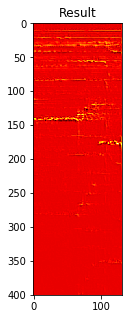

In [38]:
check = result.reshape(1025,130)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Result')
plt.imshow(check[:400,:],cmap='hot')

In [39]:
a_content[250:400,:]

array([[ 0.06193443,  0.03773856,  0.03394711, ...,  0.00080078,
         0.07128879,  0.15768856],
       [ 0.0117066 ,  0.03257371,  0.04472041, ...,  0.02676488,
         0.05348168,  0.09723369],
       [ 0.00441989,  0.0255928 ,  0.05204266, ...,  0.02848014,
         0.00895755,  0.06061174],
       ..., 
       [ 0.01175566,  0.00649558,  0.00534743, ...,  0.00955787,
         0.00976077,  0.04040208],
       [ 0.01683205,  0.01163893,  0.00946434, ...,  0.00428411,
         0.01310083,  0.03956463],
       [ 0.02036396,  0.00515523,  0.0154738 , ...,  0.0037786 ,
         0.02067233,  0.04584463]], dtype=float32)

In [40]:
check[250:400,:]

array([[ -2.98657967e-03,  -2.50430568e-03,   1.37726804e-02, ...,
         -3.62621658e-02,   4.54676151e-02,   1.06634341e-01],
       [ -2.36616954e-02,  -8.52127187e-03,   2.02644356e-02, ...,
         -2.16271766e-02,   3.25302742e-02,   8.12326521e-02],
       [ -1.31240357e-02,  -3.21123004e-03,   2.47938186e-02, ...,
         -2.06984077e-02,  -5.89190167e-05,   3.95310186e-02],
       ..., 
       [  1.56982325e-03,  -5.37326210e-04,   6.74278766e-04, ...,
         -1.38365673e-02,   7.55611749e-04,   2.76978649e-02],
       [ -3.34894256e-04,   8.05280404e-04,   3.83124780e-03, ...,
         -1.46491332e-02,   2.19014240e-03,   2.76627149e-02],
       [  7.95905071e-04,  -3.37104918e-03,  -2.17789944e-04, ...,
         -1.58352219e-02,   7.91255198e-03,   3.00771464e-02]], dtype=float32)

In [41]:
audio_utils.spectrogram_to_wave(check , 2048 , "out1.wav", sampling_rate)